In [105]:
from train import bgs 
import h5py 
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [106]:
def generate_binary_code(bit_length, batch_size_exp=None, batch_number=0):
    # No batch size is given, all data is returned
    if batch_size_exp is None:
        batch_size_exp = bit_length
    batch_size = 2 ** batch_size_exp
    # Generate batch
    bit_combinations = np.zeros((batch_size, bit_length))
    for number in range(batch_size):
        dividend = number + batch_number * batch_size
        bit_index = 0
        while dividend != 0:
            bit_combinations[number, bit_index] = np.remainder(dividend, 2)
            dividend = np.floor_divide(dividend, 2)
            bit_index += 1
    return bit_combinations

def generate_bars_and_stripes_complete(length):
    """ Creates a dataset containing all possible samples showing bars or stripes.

    :param length: Length of the bars/stripes.
    :type length: int

    :return: Samples.
    :rtype: numpy array [num_samples, length*length]
    """
    stripes = generate_binary_code(length)
    stripes = np.repeat(stripes, length, 0)
    stripes = stripes.reshape(2 ** length, length * length)

    bars = generate_binary_code(length)
    bars = bars.reshape(2 ** length * length, 1)
    bars = np.repeat(bars, length, 1)
    bars = bars.reshape(2 ** length, length * length)
    return np.vstack((stripes[0:stripes.shape[0]-1],bars[1:bars.shape[0]]))
    # return numx.vstack((stripes, bars)) # Tests have to match if changed to this.


inputs_np = generate_bars_and_stripes_complete(4)


In [107]:
nb_samples = inputs_np.shape[0]

In [108]:
with h5py.File("rbm_parameters.h5", "r") as f:
    print(f.keys()) 

    w     = np.array(f['weight_matrix'])
    eta   = np.array(f['eta_vector'])    
    theta = np.array(f['theta_vector'])
    llh   = np.array(f['log_likelihoods'])

    print(w)
    print(eta)
    print(theta)
    print(llh)

<KeysViewHDF5 ['eta_vector', 'log_likelihoods', 'theta_vector', 'weight_matrix']>
[[-0.00782423 -0.00782423 -0.00782423 -0.00782423 -0.00782423 -0.00782423
  -0.00782423]
 [ 0.00429461  0.00429461  0.00429461  0.00429461  0.00429461  0.00429461
   0.00429461]
 [ 0.00326958  0.00326958  0.00326958  0.00326958  0.00326958  0.00326958
   0.00326958]
 [-0.00894665 -0.00894665 -0.00894665 -0.00894665 -0.00894665 -0.00894665
  -0.00894665]
 [ 0.00106776  0.00106776  0.00106776  0.00106776  0.00106776  0.00106776
   0.00106776]
 [-0.00455762 -0.00455762 -0.00455762 -0.00455762 -0.00455762 -0.00455762
  -0.00455762]
 [-0.00361373 -0.00361373 -0.00361373 -0.00361373 -0.00361373 -0.00361373
  -0.00361373]
 [-0.00292402 -0.00292402 -0.00292402 -0.00292402 -0.00292402 -0.00292402
  -0.00292402]
 [-0.0018162  -0.0018162  -0.0018162  -0.0018162  -0.0018162  -0.0018162
  -0.0018162 ]
 [ 0.00336785  0.00336785  0.00336785  0.00336785  0.00336785  0.00336785
   0.00336785]
 [-0.00191975 -0.00191975 -0.

In [109]:
Nv, Nh = w.shape

In [110]:
sample_v = bgs(w, eta, theta, nb_samples, Nv, Nh, 10)[1]

sample_v[0 : 3]

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]])

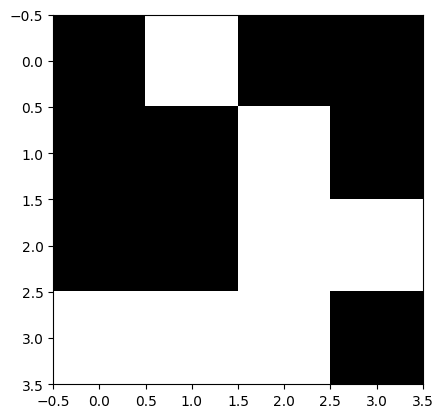

In [111]:
plt.imshow(sample_v[0].reshape(4, 4), cmap='gray')

In [112]:
def plot_image(
    sample, shape=(28, 28), grid_size=(10, 10), show_grid=False, randomize=True
):
    """Args:
    sample
    shape: (Default value = (28)
    28)
    grid_size: (Default value = (10)
    10)
    show_grid: (Default value = False)
    randomize: (Default value = True)
    """
    num_samples = grid_size[0] * grid_size[1]
    if randomize:
        id_sample = np.random.randint(0, sample.shape[0], num_samples)
    else:
        id_sample = np.arange(num_samples)

    # Create a display array with the appropriate size
    display = np.zeros((shape[0] * grid_size[0], shape[1] * grid_size[1]))

    for i, id_s in enumerate(id_sample):
        # Calculate the row and column for the grid
        idx = i // grid_size[1]  # Row index
        idy = i % grid_size[1]  # Column index

        # Ensure the sample can be reshaped to the specified shape
        display[
            (idx * shape[0]) : ((idx + 1) * shape[0]),
            (idy * shape[1]) : ((idy + 1) * shape[1]),
        ] = sample[id_s].reshape(
            shape
        )  # Directly reshape to shape

    # Plot the display image
    fig, ax = plt.subplots(1, 1)
    ax.imshow(display, cmap="gray")
    ax.axis("off")  # Hide axes

    if show_grid:
        # Minor ticks for the grid
        ax.set_xticks(np.arange(-0.5, grid_size[1] * shape[1], shape[1]), minor=True)
        ax.set_yticks(np.arange(-0.5, grid_size[0] * shape[0], shape[0]), minor=True)

        # Gridlines based on minor ticks
        ax.grid(which="minor", color="gray", linestyle="-", linewidth=2)

In [113]:
print(inputs_np)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
 [1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1.

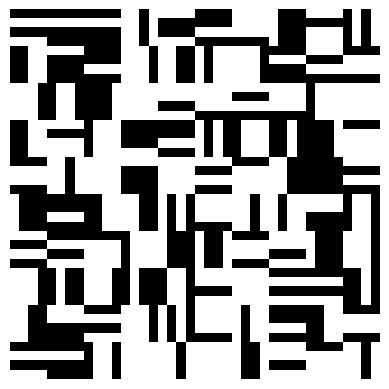

In [114]:

plot_image(sample=inputs_np.astype(int), shape=(4, 4), grid_size=(10, 10), show_grid=True)

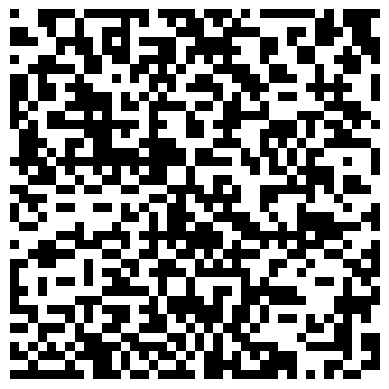

In [120]:
plot_image(sample=sample_v, shape=(4, 4), grid_size=(10, 10), show_grid=True)

In [116]:
llh

array([-20.79072937, -20.78177736, -20.77325932, -20.77071763,
       -20.75874278, -20.75064025, -20.76116758, -20.76577149,
       -20.75711626, -20.76225943, -20.77291093, -20.78456843,
       -20.77222425, -20.77064941, -20.76730833, -20.75929205,
       -20.75710279, -20.71409825, -20.73215819, -20.71027681,
       -20.69853937, -20.69237479, -20.69506831, -20.69598559,
       -20.68217399, -20.69679793, -20.6820248 , -20.70618866,
       -20.69891841, -20.70101737, -20.67815287, -20.66072693,
       -20.68315104, -20.67011318, -20.67827336, -20.69701822,
       -20.6817212 , -20.64883039, -20.64356476, -20.67804674,
       -20.65076647, -20.63288306, -20.65317785, -20.65059045,
       -20.6386661 , -20.63998821, -20.63658972, -20.63090304,
       -20.63592081, -20.64542948, -20.62677924, -20.65053868,
       -20.64789693, -20.63157728, -20.6694366 , -20.6435781 ,
       -20.64181068, -20.61803287, -20.60063964, -20.64421817,
       -20.64102643, -20.64245681, -20.64172073, -20.65

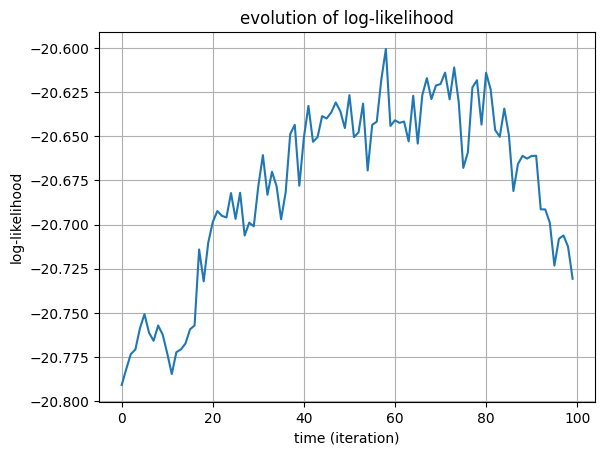

In [117]:
plt.plot(llh)
plt.xlabel("time (iteration)")
plt.ylabel("log-likelihood")
plt.title("evolution of log-likelihood")
plt.grid(True)

In [118]:
def generate_bars_and_stripes_complete(length):
    """ Creates a dataset containing all possible samples showing bars or stripes.

    :param length: Length of the bars/stripes.
    :type length: int

    :return: Samples.
    :rtype: numpy array [num_samples, length*length]
    """
    stripes = generate_binary_code(length)
    stripes = np.repeat(stripes, length, 0)
    stripes = stripes.reshape(2 ** length, length * length)

    bars = generate_binary_code(length)
    bars = bars.reshape(2 ** length * length, 1)
    bars = np.repeat(bars, length, 1)
    bars = bars.reshape(2 ** length, length * length)
    return np.vstack((stripes[0:stripes.shape[0]-1],bars[1:bars.shape[0]]))
    # return numx.vstack((stripes, bars)) # Tests have to match if changed to this.


new_input = generate_bars_and_stripes_complete(4)

In [119]:
generate_binary_code()

TypeError: generate_binary_code() missing 1 required positional argument: 'bit_length'

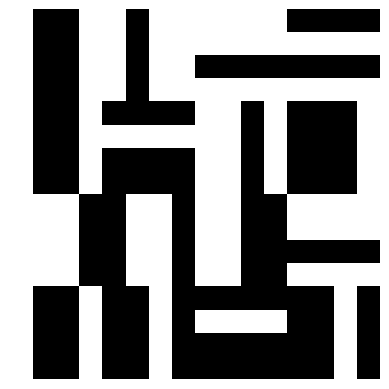

In [ ]:
plot_image(sample=new_input, shape=(4, 4), grid_size=(4, 4), show_grid=True)